In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.models import common_neighbor_community as cnc
from src.data import random_graph as rg

r_seed = 123

%load_ext autoreload
%autoreload 2

## Big Gap Graph

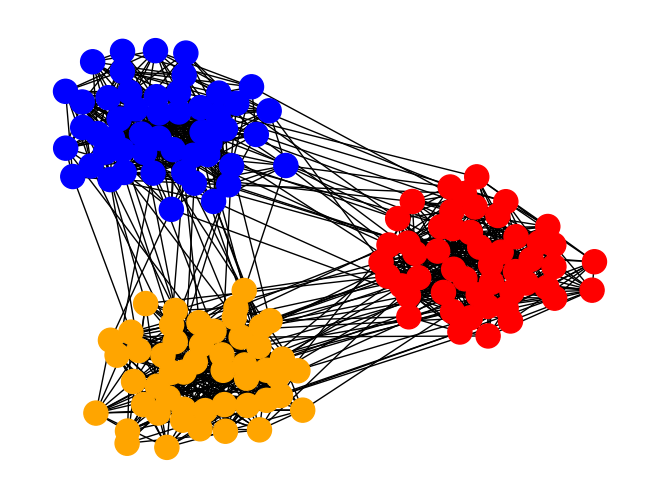

In [2]:
RG = rg.RandomCommunitiesGraph()
G, actual_com = RG.generate_random_com_graph(N=150,
                                            n_groups=3,
                                            p_in_group=0.3,
                                            p_out_group=0.01,
                                            seed=r_seed)

RG.draw(seed=r_seed)

In [3]:
CNC = cnc.CommonNeighborCommunity(G, actual_com)
CNC.findAllCommunities(thres=0.1, weighted=True)
re = CNC.getResult()
re

,pred_com,actual_com
node,,
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2


In [4]:
G = CNC.G

In [5]:
preds = CNC.getPredCommunities()
len(preds)

3

In [6]:
coms = []
for com in preds:
    coms.append(preds[com])

print("com 0 len:", len(coms[0]))
len(coms)

com 0 len: 50


3

In [7]:
import networkx as nx

In [8]:
nx.__version__

'2.8.8'

In [9]:
nx.algorithms.community.modularity(G, coms)

0.5933738665251529

In [10]:
nx.algorithms.community.modularity(G, nx.algorithms.community.louvain_communities(G))

0.5933738665251529